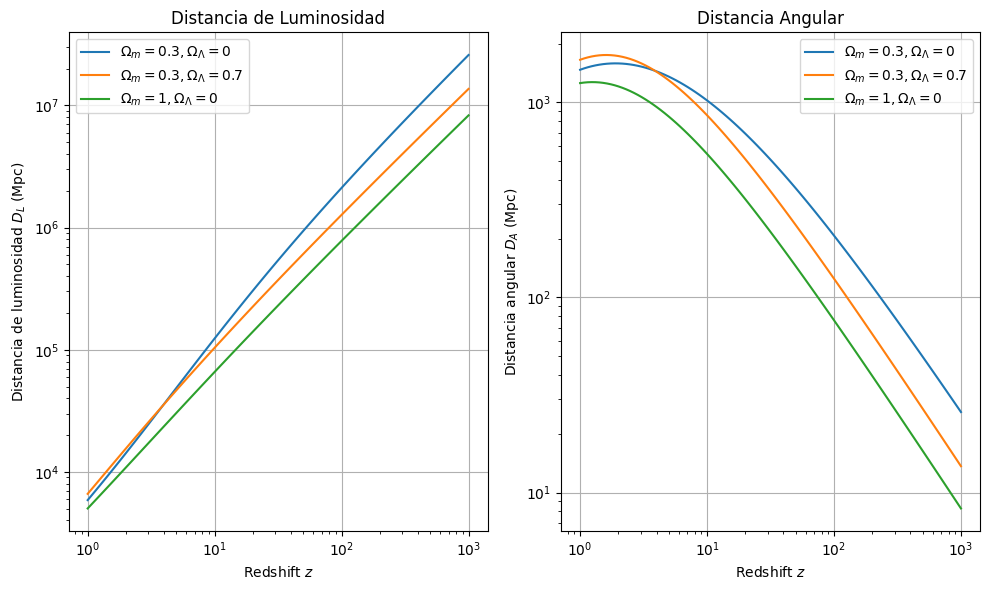

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import  LambdaCDM

# Definimos el rango de redshift
z = np.logspace(0, 3, 100)  # de z = 1 a z = 1000

# Parámetros cosmológicos dados en el problema
cosmo1 = LambdaCDM(H0=70, Om0=0.3, Ode0=0)   # Ωm = 0.3, ΩΛ = 0
cosmo2 = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7) # Ωm = 0.3, ΩΛ = 0.7
cosmo3 = LambdaCDM(H0=70, Om0=1.0, Ode0=0)   # Ωm = 1, ΩΛ = 0

# Calcular distancias para cada modelo cosmológico
def calculate_distances(cosmo, z):
    D_L = cosmo.luminosity_distance(z)  # Distancia de luminosidad en Mpc
    D_A = cosmo.angular_diameter_distance(z)  # Distancia angular en Mpc
    return D_L, D_A

D_L1, D_A1 = calculate_distances(cosmo1, z)
D_L2, D_A2 = calculate_distances(cosmo2, z)
D_L3, D_A3 = calculate_distances(cosmo3, z)

# Gráficos de las distancias
plt.figure(figsize=(10, 6))

# Gráfico de distancia de luminosidad
plt.subplot(1, 2, 1)
plt.loglog(z, D_L1, label=r'$\Omega_m=0.3, \Omega_\Lambda=0$')
plt.loglog(z, D_L2, label=r'$\Omega_m=0.3, \Omega_\Lambda=0.7$')
plt.loglog(z, D_L3, label=r'$\Omega_m=1, \Omega_\Lambda=0$')
plt.xlabel('Redshift $z$')
plt.ylabel(r'Distancia de luminosidad $D_L$ (Mpc)')
plt.title('Distancia de Luminosidad')
plt.legend()
plt.grid()

# Gráfico de distancia angular
plt.subplot(1, 2, 2)
plt.loglog(z, D_A1, label=r'$\Omega_m=0.3, \Omega_\Lambda=0$')
plt.loglog(z, D_A2, label=r'$\Omega_m=0.3, \Omega_\Lambda=0.7$')
plt.loglog(z, D_A3, label=r'$\Omega_m=1, \Omega_\Lambda=0$')
plt.xlabel('Redshift $z$')
plt.ylabel(r'Distancia angular $D_A$ (Mpc)')
plt.title('Distancia Angular')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [5]:
import numpy as np
from scipy.integrate import quad
from astropy import constants as c
from astropy import units as u
from astropy.cosmology import WMAP9 as cosmo

# Parámetros cosmológicos
H0 = 70  # Constante de Hubble en km/s/Mpc
Omega_r = 0.0       # Densidad de radiación (se desprecia a tiempos actuales)
Omega_m = 0.3       # Densidad de materia
Omega_Lambda = 0.7  # Densidad de energía oscura
Omega_K = 1.0 - (Omega_m + Omega_Lambda)  # Curvatura plana

# Constantes
H0_SI = (cosmo.H(0)).to(u.s**-1).value  # H0 en unidades de 1/s

# Función integrando
def integrand(a, Omega_r, Omega_m, Omega_K, Omega_Lambda):
    term_r = Omega_r * (1 / a)**4
    term_m = Omega_m * (1 / a)**3
    term_k = Omega_K * (1 / a)**2
    term_L = Omega_Lambda
    return 1 / (a * np.sqrt(term_r + term_m + term_k + term_L))

# Cálculo de la edad del universo
a0 = 1.0  # Factor de escala actual
result, error = quad(integrand, 0, a0, args=(Omega_r, Omega_m, Omega_K, Omega_Lambda))

# Convertir la integral en tiempo en segundos
t0_seconds = result / H0_SI

# Convertir a Gigaaños
t0_gigayears = t0_seconds / (1e9 * 365.25 * 24 * 3600)

# Mostrar resultados
print(f"Edad del universo: {t0_gigayears:.2f} Giga-años")


Edad del universo: 13.60 Giga-años
